# MACHINE LEARNING 


Fecha: 03/11/2019

Autor: Lucía Saiz Lapique

Área: Machine Learning

Título: Práctica 1 - análisis de base de datos

## Lista de top 50 canciones en Spotify

Spotify es un servicio de música, podcasts y vídeos digitales en streaming que te da acceso a millones de canciones y otros contenidos de artistas de todo el mundo. Fue originado en Suecia en 2006 y lanzado al mercado en 2008. Las funciones básicas, como escuchar música, son totalmente gratis, pero también tienes la opción de mejorar tu cuenta con Spotify Premium. De cualquiera de las dos maneras, puedes:

* Elegir lo que quieres escuchar con Explorar y Buscar. 
* Recibir recomendaciones en funciones personalizadas, como Descubrimiento semanal, Radar de Novedades y Daily Mix.
* Montar colecciones de música.
* Ver lo que escuchan amigos, artistas y famosos.
* Crear tus propias emisoras de radio.

Esta aplicación cuenta con una serie de listas de canciones (playlists), organizadas por características como género, popularidad, cantantes, países, etc. Las playlists son simplemente colecciones de canciones. Puedes hacerlas tú, compartirlas y también disfrutar de los millones de otras playlists creadas por Spotify, por artistas y por otros oyentes de todo el mundo.

Entre estas, existen listas de las canciones más populares o más escuchadas, tanto en todo el mundo como organizadas por países. Son listas cambiantes, donde aparecen las 50 canciones más reproducidas en orden de popularidad. A continuación utilizaremos una base de datos donde se incluyen las canciones del "top 50" del mundo hace 3 meses, para intentar averiguar si existe algún patrón que relacione las carácteristicas de las canciones con su puesto en la lista.  

In [2]:
import numpy as np 
import pandas as pd
spotify = pd.read_csv('top50.csv', encoding = 'ISO-8859-1') 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy import stats as sts # normality test JB
from sklearn import model_selection
from sklearn.linear_model import Ridge, RidgeCV # Ridge
from sklearn.linear_model import Lasso, LassoCV # Lasso
from sklearn.metrics import r2_score # R^2
from sklearn.model_selection import train_test_split # split data
from sklearn.metrics import mean_squared_error # MSE
from sklearn.preprocessing import StandardScaler # estandarization
from math import sqrt # sqrt
import itertools # aplanar arrays
import statsmodels.api as sm

### Problema de negocio y objetivo del estudio

El objetivo de este estudio es averiguar si existe una tendencia o patrón entre las caracteristicas de las canciones que se posicionan como populares en las listas de las canciones más escuchadas por país o a nivel global. Si resulta que existe, podría ser información relevante para, no solo artistas que quieren formar parte de esa lista, sino para personas empezando una carrera musical y necesiten saber a qué estilo o modas se tienen que acoplar. 

Realizaremos una predicción de la popularidad de las canciones basándonos en variables específicas, averiguando primero cuáles son más relevantes que otras y creando un modelo después con las variables que hayamos dado por relevantes. 

### Descripción de las variables

En primer lugar, imprimimos la base de datos completa y analizamos su estructura para hacer una visualización previa de cuántos datos hay

In [3]:
spotify

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [4]:
print(spotify.shape)

(50, 14)


In [5]:
spotify.info

<bound method DataFrame.info of     Unnamed: 0                                         Track.Name  \
0            1                                           Señorita   
1            2                                              China   
2            3                      boyfriend (with Social House)   
3            4                    Beautiful People (feat. Khalid)   
4            5                        Goodbyes (Feat. Young Thug)   
5            6                  I Don't Care (with Justin Bieber)   
6            7                                             Ransom   
7            8                                  How Do You Sleep?   
8            9                              Old Town Road - Remix   
9           10                                            bad guy   
10          11                                           Callaita   
11          12              Loco Contigo (feat. J. Balvin & Tyga)   
12          13                                  Someone You Loved   
13

In [6]:
list(spotify)

['Unnamed: 0',
 'Track.Name',
 'Artist.Name',
 'Genre',
 'Beats.Per.Minute',
 'Energy',
 'Danceability',
 'Loudness..dB..',
 'Liveness',
 'Valence.',
 'Length.',
 'Acousticness..',
 'Speechiness.',
 'Popularity']

Vemos que la base de datos escogida consiste de 50 muestras (las 50 canciones más escuchadas/populares en Spotify hace tres meses en todo el mundo) y 14 variables. Existen variables cualitativas, como el nombre de las canciones, el nombre de los artistas y el género de música de cada canción, y luego también variables cuantitativas que representan características de cada canción en valores numéricos. Estas variables indican:
* Beats.Per.Minute: El tempo (ritmo) de la canción.
* Energy: la energía de la canción (cuanto mayor sea el valor, más energética es la canción).
* Danceability: Cuanto mayor es el valor, más fácil es de bailar con cada canción.
* Loudness..dB..: Los valores mayores representan que las canciones tienen volúmen más alto.
* Liveness: Si el valor es mayor, significa que las canciones fueron grabadas en vivo. 
* Valence: Cuanto mayor es el valor, más positivo es el ánimo de la canción. 
* Length: Duración de la canción.
* Acousticness.: Mide lo acústica que es cada canción. 
* Speechiness.: Si lla canción contiene mucha letra, el valor de esta variable es mayor.
* Popularity: Cuánto más popular sea la canción, mayor es el valor.

Vemos también que las variables tienen nombres que no son cómodos de utilizar. A continuación decidimos coger la base de datos y eliminar los datos que contengan NA o que estén vacios (NULL) ya que esos no le van a aportar nada a nuestro estudio y cambiarle los nombres a las variables para facilitar su uso más adelante. 

In [7]:
data=spotify.dropna(how='all')
spotify = spotify.rename(columns={"Genre": "Genero", "Track.Name": "Nombre", "Artist.Name": "Artista", "Loudness..dB..": 
                                  "Volumen", "Acousticness..": "Acustico", "Speechiness.":"Letra","Valence.":"Animo",
                                  "Length.":"Longitud", "Beats.Per.Minute":"Ritmo", "Energy": "Energia", "Danceability": 
                                  "Bailar", "Liveness": "Vivo", "Popularity": "Popular"})
spotify



,Unnamed: 0,Nombre,Artista,Genero,Ritmo,Energia,Bailar,Volumen,Vivo,Animo,Longitud,Acustico,Letra,Popular
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


Vemos que en la columna de género de música, para hacerla más relevante, se pueden agrupar los géneros de otra forma; en la columna existen muchos géneros parecidos, por no decir los mismos, así que decidimos agruparlos de manerá más general y que así la variable pueda aportar algo a la predicción. Una vez agrupados, podemos reperesentar los géneros gráficamente con un gráfico de barras que nos de una idea inicial de cuál es el género más escuchado en el top 50 del mundo.  

In [8]:
spotify['Genero_gral']=['hip hop' if each =='atl hip hop'
                      else 'hip hop' if each =='canadian hip hop'
                      else 'hip hop' if each == 'trap music'
                      else 'pop' if each == 'australian pop'
                      else 'pop' if each == 'boy band'
                      else 'pop' if each == 'canadian pop'
                      else 'pop' if each == 'dance pop'
                      else 'pop' if each == 'panamanian pop'
                      else 'pop' if each == 'pop'
                      else 'pop' if each == 'pop house'
                      else 'electronic' if each == 'big room'
                      else 'electronic' if each == 'brostep'
                      else 'electronic' if each == 'edm'
                      else 'electronic' if each == 'electropop'
                      else 'rap' if each == 'country rap'
                      else 'rap' if each == 'dfw rap'
                      else 'escape room' if each == 'hip hop'
                      else 'latin' if each == 'latin'
                      else 'latin' if each == 'reggaeton flow'
                      else 'latin' if each == 'reggaeton'
                      else 'r&b' if each == 'r&b en espanol'
                      else 'raggae' for each in data['Genre']]
spotify.groupby('Genero_gral').size()

Genero_gral
electronic     8
hip hop        5
latin          9
pop           22
r&b            1
raggae         1
rap            4
dtype: int64

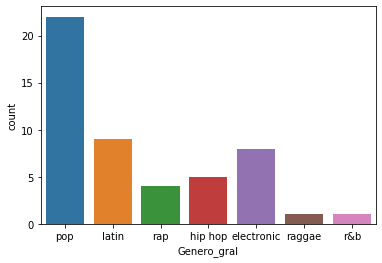

In [9]:
sns.countplot(x="Genero_gral", data = spotify)

El género más popular es claramente pop, seguido de música latino americana y música electrónica. 

Para visualizar los datos antes de crear los gráficos relevantes, hacemos un pequeño resumen que nos aporta la media, desviación típica, cuartiles y valore mínimos y máixmos de todas las variables. 

In [10]:
spotify.describe()

,Unnamed: 0,Ritmo,Energia,Bailar,Volumen,Vivo,Animo,Longitud,Acustico,Letra,Popular
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


Las conclusiones que podemos sacar de este breve resumen son: 
* las varibales que tienen una mayor varianza son la longitud de la canción y el ritmo de la canción. 
* la variable con la menor varianza es la popularidad de la canción, que ronda entre 70 y 95. 
* por lo general, exceptuando la cantidad de letra y lo acústicas que son las canciones, la media se acerca mucho al segundo cuatrtil, lo cual indica que las medias se ajustan bastante a la realidad y hay pocos datos atípicos. 


In [11]:
spotify_dummies = pd.get_dummies(spotify["Genero_gral"])
spotify_dummies

,electronic,hip hop,latin,pop,r&b,raggae,rap
0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1
5,0,0,0,1,0,0,0
6,0,1,0,0,0,0,0
7,0,0,0,1,0,0,0
8,0,0,0,0,0,0,1
9,1,0,0,0,0,0,0


In [12]:
spotify2 = pd.concat([spotify, spotify_dummies], axis=1)
spotify2


,Unnamed: 0,Nombre,Artista,Genero,Ritmo,Energia,Bailar,Volumen,Vivo,Animo,...,Letra,Popular,Genero_gral,electronic,hip hop,latin,pop,r&b,raggae,rap
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,...,3,79,pop,0,0,0,1,0,0,0
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,...,9,92,latin,0,0,1,0,0,0,0
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,...,46,85,pop,0,0,0,1,0,0,0
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,...,19,86,pop,0,0,0,1,0,0,0
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,...,7,94,rap,0,0,0,0,0,0,1
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,...,4,84,pop,0,0,0,1,0,0,0
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,...,29,92,hip hop,0,1,0,0,0,0,0
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,...,9,90,pop,0,0,0,1,0,0,0
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,...,10,87,rap,0,0,0,0,0,0,1
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,...,38,95,electronic,1,0,0,0,0,0,0


### Gráficos

Previo a la creación de nuestro modelo predictivo, hacemos una decripción de las variables con una serie de gráficos. Hacemos dos representaciones distintas de la distribución de las variables:
* Histogramas
* Gráficos de dispersión

Cada variable estará representada en un gráfico de cada tipo. 

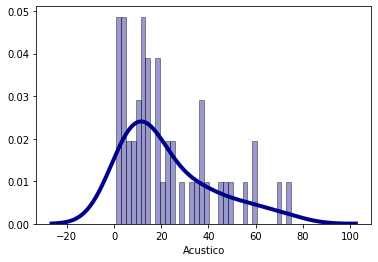

In [13]:
acustico_hist = sns.distplot(spotify['Acustico'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

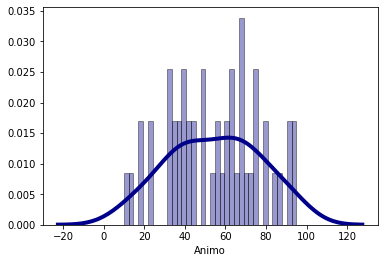

In [14]:
animo_hist = sns.distplot(spotify['Animo'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

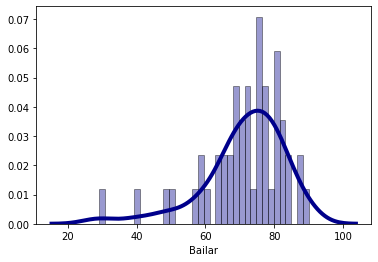

In [15]:
bailar_hist = sns.distplot(spotify['Bailar'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

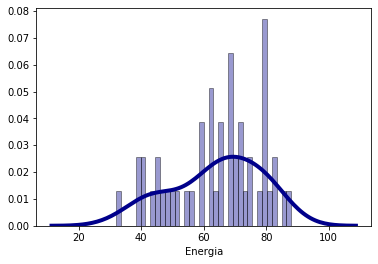

In [16]:
energia_hist = sns.distplot(spotify['Energia'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

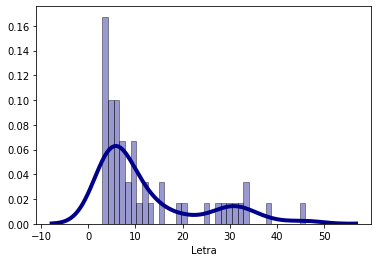

In [17]:
letra_hist = sns.distplot(spotify['Letra'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

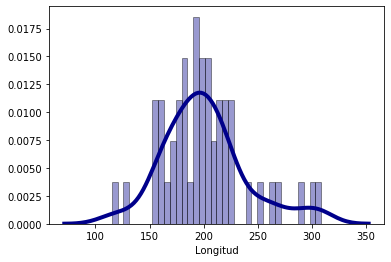

In [18]:
long_hist = sns.distplot(spotify['Longitud'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

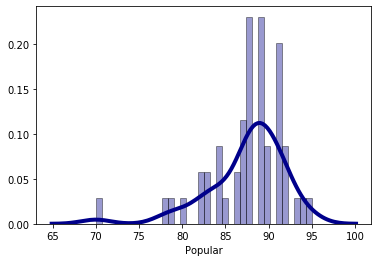

In [19]:
pop_hist = sns.distplot(spotify['Popular'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

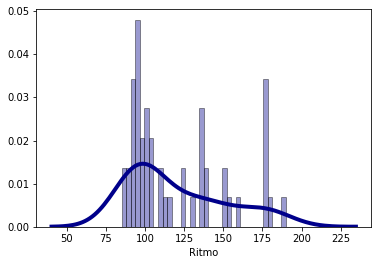

In [20]:
ritmo_hist = sns.distplot(spotify['Ritmo'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

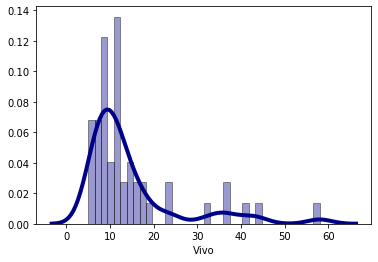

In [21]:
vivo_hist = sns.distplot(spotify['Vivo'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

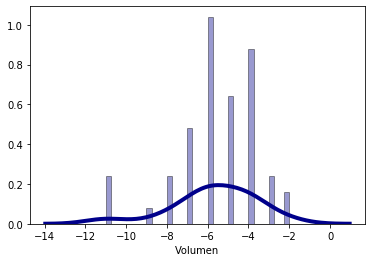

In [22]:
volumen_hist = sns.distplot(spotify['Volumen'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

#### Resumen histogramas

Podemos sacar una serie de conclusiones de cada variable gracias a la información que obtenemos de los histogramas representados en el apartado anterior:
* Que las variables que tienen mayor representación de valores bajos son el nivel de acústica de las canciones, la cantidad de letra, el ritmo, y las canciones grabadas en vivo. 
* Longitud y volumen tienen dispersiones de tipo normal, la mayoría de sus variables encontrándose entorno a la media. 
* El resto de variables están sobretodo concentradas en valores máximos 

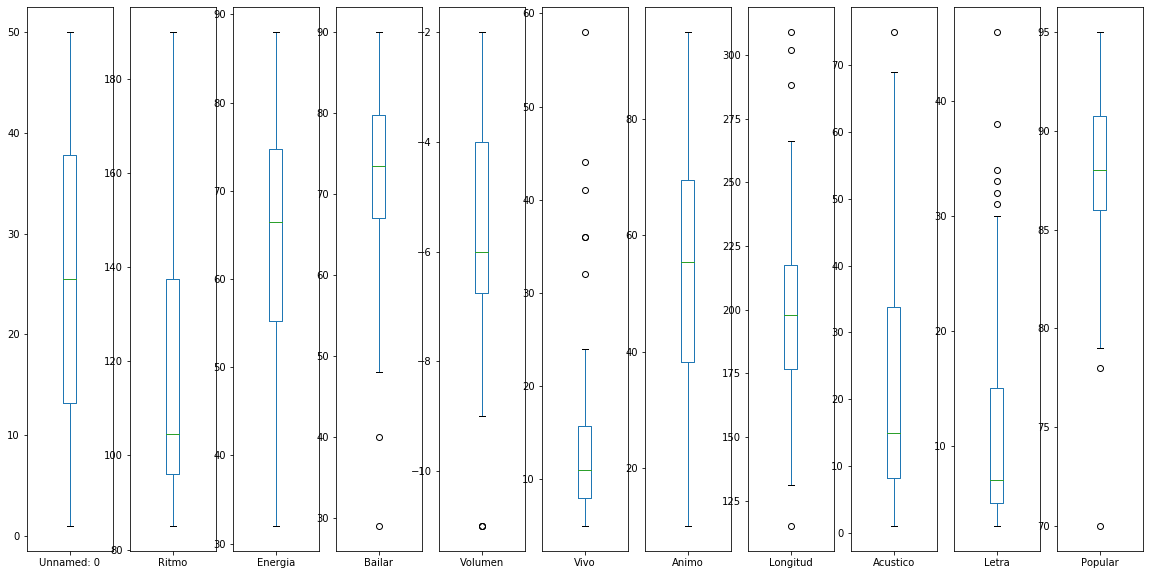

In [23]:
# Gráficos de dispersión
spotify.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.gcf().set_size_inches(20, 10)
plt.show()


#### Resumen gráficos de dispersión
En estos gráficos vemos representada información muy similar a lo q se observaba en los histogramas de las variables, 

### Gráficos de correlación
A continuación creamos dos gráficos que representen la correlación existente entre todas las variables, para ver si existe algún tipo de dependencia directa entre unas y otras. En primer lugar, estudiaremos la correlación entre la variable que queremos predecir más adelante y las demás. Después haremos un gráfico triangular de correlación entre todas las variables de valor numérico, donde obtendremos, seguramente, valores positivos y negativos, más o menos cercanos a 0. 

In [24]:
corr[["Popular"]].sort_values(by = "Popular", ascending = False)\
.style.background_gradient()

NameError: name 'corr' is not defined

#### Relación respecto a "Popular"
En esta reprsentación de las variables, vemos como la variable más relacionada a "Popular" es "Letra", seguida de"Ritmo". De primeras, los resultados tienen sentido pues parece obvio que al escuchar música, nos guste más o menos una canción según la cantidad de letra que tiene o el ritmo que tiene. Sin embargo, seguimos estudiando si existen otras relaciones entre las demás variables. 

A continuación, antes de crear el gráfico, creamos una matriz de correlación que compare a las variables y obtenemos los siguientes resultados. Acto seguido los representamos en una gráfica de tipo triangular. 

In [ ]:
df = pd.DataFrame(data = spotify)
corr = df.corr()
print(corr)


In [ ]:
mask = np.zeros_like(spotify.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap (spotify.corr(), mask = mask, annot = True)
plt.gcf().set_size_inches(20,10)
plt.show()

#### Resultado gráfico de correlación
En el gráfico que obtenemos con la correlación de las variables vemos, como era de esperar, relaciones directas e indirectas entre las variables. Las relaciones positivas están represenrados por colores anaranjados y más claros, mientras que las negativas se ven con tonos morados y más oscuros. En las indirectas, cuanto más oscuro es el tono, mayor es la relación; en las relaciones directas es al reves. Como conclusiones, deducimos que:
* Las relaciones positivas con mayor peso son entre energía y volumen, entre ritmo y letra, y luego entre energía y ánimo, en ese orden. 
* Las relaicones negativas con mayor peso son entre energía y acústico, entre ánimo y popular, y entre volumen y letra, en ese orden. 
* La variable "popular", que es la variable que queremos predecir con nuestro modelo más adelante, está relacionada con ritmo, ánimo y letra, principalmente. 

La última característica tendremos que tenerla en cuenta a la hora de formular nuestro modelo predictivo, ya que hay que asumir que, probablemente, sean más influyentes que otras variables, y por tanto sean relevantes a la hora de elegir modelo.


## Train y test split

Para crear nuestro modelo predictor, debemos crear un entrenamiento y un test de nuestras variables. Para ello elegimos una patrte de la base de datos, que sera la parte de entrenamiento, de la cual crearemos el modelo. La parte de test será la parte restante de nuestra base de datos que no usemos en el train y que va a demostrar el ajuste del modelo y cómo este reaccionaría en el caso de introducir nuevas muestras. En primer lugar, imprimimos la base de datos sobre la que vamos a crear el modelo y analizamos nuestros datos. 

In [ ]:
spotify2

Como vemos, nuestra base de datos está formada tanto por variables categóricas como numéricas; para el modelo solo nos interesa utilizar varibales numéricas así que excluimos "Nombre", "Artista" y "Genero", y usamos las variables dummies que hemos creado de la categoría "Genero_gral". Una vez hemos hecho eso, nos aseguramos de que todas nuestras variables están en formato numérico y pasamos a crear el modelo con train. 

In [ ]:
spotify2['Acustico'] = spotify2['Acustico'].astype(int)
spotify2['Ritmo'] = spotify2['Ritmo'].astype(int)
spotify2['Energia'] = spotify2['Energia'].astype(int)
spotify2['Bailar'] = spotify2['Bailar'].astype(int)
spotify2['Volumen'] = spotify2['Volumen'].astype(int)
spotify2['Vivo'] = spotify2['Vivo'].astype(int)
spotify2['Animo'] = spotify2['Animo'].astype(int)
spotify2['Longitud'] = spotify2['Longitud'].astype(int)
spotify2['Acustico'] = spotify2['Acustico'].astype(int)
spotify2['Letra'] = spotify2['Letra'].astype(int)


In [ ]:
endogena = ['Popular'] 
exogenas = ['Ritmo','Energia','Bailar','Volumen','Vivo','Animo','Longitud','Acustico',
                    'Letra']

In [ ]:
X = spotify2[exogenas].values
Y = spotify2[endogena].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

## Modelos de predicción

### Modelo Lasso

In [ ]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, Y_train)
lassocv.alpha_

# realizo la regresion

model_lasso = Lasso(alpha=lassocv.alpha_) # funcion lasso
model_lasso.fit(X_train, Y_train) # ajuste sobre el train

### Modelo Ridge

In [ ]:
alphas = 10**np.linspace(10, -2, 100)*0.5
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, Y_train)
ridgecv.alpha_
RidgeRegression = Ridge(alpha = ridgecv.alpha_) 
RidgeRegression.fit(X_train, Y_train) 


En primer lugar, genero los valores de alpha que voy a utilizar en el modelo. A continuacion averiguo el valor optimo de alpha para la regresion ridge, aquel que dé un menor error cuadratico medio. Con ese valor realizo la regresion, usando la funcion ridge. Finalmente se hace un ajuste sobre el train. 

Tras crear los modelos, realizamos la predicción sobre la parte de test de la base de datos usando los tres modelos y así averiguaremos cual es el que genera el menor error y será, consecuentemente, el modelo ideal para averiguar cuáles son las características que hacen que una canción esté en el top 50 del mundo en Spotify.

## Predicción

Llevamos a cabo tres cálculos: la predicción sobre el test (que utilizaremos en las siguientes dos partes), el error del modelo sobre el test y el Rcuadrado sobre el test. Una vez obtengamos estos valores para los tres modelos, eligiremos el modelo que tenga el menor error posible y el mayor Rcuadrado. 

### Predicción del modelo Lasso

In [ ]:
pred_lasso = model_lasso.predict(X_test) # prediccion sobre el test
print(np.sqrt(mean_squared_error(Y_test,pred_lasso))) # error sobre el test
error_lasso = np.sqrt(mean_squared_error(Y_test,pred_lasso))
print(r2_score(Y_test, pred_lasso)) # R^2 sobre el test

### Predicción del modelo Ridge

In [ ]:
pred_test_rr = RidgeRegression.predict(X_test) # prediccion sobre el test
print(np.sqrt(mean_squared_error(Y_test,pred_test_rr)))  # error sobre el test
error_ridge = np.sqrt(mean_squared_error(Y_test,pred_test_rr))
print(r2_score(Y_test, pred_test_rr)) # R^2 sobre el test

## Conclusión

El modelo que tiene el menor error y el mayor Rcuadrado es el Modelo Lasso; ese es el modelo que mejor predice el problema propuesto al principio del estudio. 

## Bibliografía

* https://support.spotify.com/es/using_spotify/the_basics/what-is-spotify/
* https://promocionmusical.es/spotify-y-su-modelo-de-negocio/
* https://www.linkedin.com/pulse/an%C3%A1lisis-exploratorio-de-datos-con-python-almudena-bonaplata
* https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7
* https://www.codigofuente.org/modelos-lineales-generalizados-con-python-y-statsmodels/
* https://www.kaggle.com/leonardopena/top50spotify2019